<div style="text-align: center">
    <h1> Análise Exploratória de Dados: Estudo de Desempenho de Hipermercado no Varejo Europeu </h1>
</div>

## Considerações Iniciais
Este projeto foi desenvolvido em um contexto hipotético e utiliza dados disponibilizados abertamente na internet para criar um cenário de análise.

Logo abaixo, apresento o código Python utilizado para realizar este estudo. Para o relatório detalhado do projeto contendo as explicações e as visualizações, visite o seguinte link: [Análise Exploratória de Dados: Estudo de Desempenho de Hipermercado no Varejo Europeu](https://github.com/L-Pizzetti/portfolio-analise-de-dados/blob/main/An%C3%A1lise%20Explorat%C3%B3ria%20de%20Dados%20-%20Hipermercado%20Europeu/relatorio.md)

**Observação:** os pontos "1 — Entendimento do Negócio" e "2 — Coleta dos Dados" não estão presentes neste notebook, pois estão detalhados no relatório completo do projeto.

### Descrição do Conjunto de Dados
Os dados utilizados para essa análise consistem em um conjunto de dados de vendas de produtos da categoria de escritório, móveis e tecnologia. O conjunto de dados é composto por 20 colunas e 10.000 linhas, contém informações sobre vendas realizadas entre 2020 e 2023.

### Descrição das Variáveis
As variáveis presentes no conjunto de dados são as seguintes:
| Coluna | Descrição |
| --- | --- |
| ID da linha | Identificação única para cada linha. |
| ID do pedido | Identificação única do pedido para cada cliente. |
| Data do pedido | Data do pedido do produto. |
| Data de envio | Data de envio do produto. |
| Modo de envio | Modo de envio especificado pelo cliente. |
| ID do cliente | Identificação única para cada cliente. |
| Nome do cliente | Nome do cliente. |
| Segmento | Segmento ao qual o cliente pertence. |
| Cidade | Cidade de residência do cliente. |
| Estado | Estado de residência do cliente. |
| País | País de residência do cliente. |
| Região | Região à qual o cliente pertence. |
| ID do produto | Identificação única do produto. |
| Categoria | Categoria do produto encomendado. |
| Subcategoria | Subcategoria do produto encomendado. |
| Nome do produto | Nome do produto. |
| Vendas | Valor total pago pelo cliente na compra. |
| Quantidade | Quantidade do produto. |
| Desconto | Desconto fornecido. |
| Lucro | Lucro/prejuízo incorrido. |

## Configurações Iniciais e Carregamento dos Dados

In [1]:
# Instalando a biblioteca necessária para leitura de arquivos xls
%pip install xlrd

# Importando as bibliotecas necessárias para a análise
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy import stats

# Configurando para que os gráficos sejam exibidos corretamente no próprio notebook
%matplotlib inline

# Configurando o estilo dos gráficos
plt.style.use("seaborn-v0_8-ticks")
plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["axes.grid"] = True

# Definindo um formato customizado para os valores dos eixos
def custom_formatter(x, pos):
    """Formata os valores dos eixos no formato desejado."""
    return '€{:,.0f}'.format(x).replace(",", "X").replace(".", ",").replace("X", ".")

# Carregando os dados
df = pd.read_excel("/workspaces/AED-Python/Dados Brutos/Dados_Hipermercado.xls")

# Verificando se os dados foram carregados corretamente
df.head(10)

Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_5931/642627225.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,ID riga,ID ordine,Data ordine,Data spedizione,Modalità spedizione,ID cliente,Nome cliente,Segmento,Città,Provincia,Paese/Area,Regione,ID prodotto,Categoria,Sottocategoria,Nome prodotto,Vendite,Quantità,Sconto,Profitto
0,1,ES-2023-1311038,2023-02-07,2023-02-11,Standard,AS-10045,Aaron Smayling,Grandi aziende,Leeds,England,United Kingdom,Nord,OFF-ST-10000988,Forniture per ufficio,Conservazione,"Fellowes Folders, Blue",79.20,3,0.0,39.60
1,2,ES-2023-1311038,2023-02-07,2023-02-11,Standard,AS-10045,Aaron Smayling,Grandi aziende,Leeds,England,United Kingdom,Nord,TEC-AC-10004144,Tecnologia,Accessori,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00
2,3,ES-2023-1311038,2023-02-07,2023-02-11,Standard,AS-10045,Aaron Smayling,Grandi aziende,Leeds,England,United Kingdom,Nord,OFF-LA-10001915,Forniture per ufficio,Etichette,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11
3,4,ES-2023-1311038,2023-02-07,2023-02-11,Standard,AS-10045,Aaron Smayling,Grandi aziende,Leeds,England,United Kingdom,Nord,OFF-ST-10004550,Forniture per ufficio,Conservazione,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20
4,5,ES-2023-1311038,2023-02-07,2023-02-11,Standard,AS-10045,Aaron Smayling,Grandi aziende,Leeds,England,United Kingdom,Nord,TEC-AC-10004068,Tecnologia,Accessori,"Memorex Memory Card, USB",307.44,3,0.0,73.71
5,6,ES-2023-1311038,2023-02-07,2023-02-11,Standard,AS-10045,Aaron Smayling,Grandi aziende,Leeds,England,United Kingdom,Nord,OFF-ST-10002271,Forniture per ufficio,Conservazione,"Rogers Shelving, Wire Frame",122.40,2,0.0,37.92
6,7,ES-2023-1311038,2023-02-07,2023-02-11,Standard,AS-10045,Aaron Smayling,Grandi aziende,Leeds,England,United Kingdom,Nord,TEC-PH-10003963,Tecnologia,Telefoni,"Apple Signal Booster, Full Size",413.82,3,0.0,20.61
7,8,ES-2021-5113958,2021-08-02,2021-08-07,Due/tre giorni,EB-13840,Ellis Ballard,Grandi aziende,West Bromwich,England,United Kingdom,Nord,TEC-CO-10004325,Tecnologia,Fotocopiatrici,"Canon Personal Copier, Laser",428.22,3,0.0,192.69
8,9,ES-2021-5113958,2021-08-02,2021-08-07,Due/tre giorni,EB-13840,Ellis Ballard,Grandi aziende,West Bromwich,England,United Kingdom,Nord,OFF-AP-10004512,Forniture per ufficio,Elettrodomestici,"Hoover Stove, Red",3979.29,7,0.0,1989.54
9,10,ES-2021-5113958,2021-08-02,2021-08-07,Due/tre giorni,EB-13840,Ellis Ballard,Grandi aziende,West Bromwich,England,United Kingdom,Nord,OFF-FA-10002393,Forniture per ufficio,Strumenti per il fissaggio,"Accos Push Pins, Bulk Pack",43.56,3,0.0,12.60


## 3 — Pré-processamento de Dados

In [2]:
# Definindo os nomes das colunas em português
nomes_colunas = {
    "ID riga": "id_linha",
    "ID ordine": "id_pedido",
    "Data ordine": "data_pedido",
    "Data spedizione": "data_envio",
    "Modalità spedizione": "modo_envio",
    "ID cliente": "id_cliente",
    "Nome cliente": "nome_cliente",
    "Segmento": "segmento",
    "Città": "cidade",
    "Provincia": "estado",
    "Paese/Area": "pais",
    "Regione": "regiao",
    "ID prodotto": "id_produto",
    "Categoria": "categoria",
    "Sottocategoria": "subcategoria",
    "Nome prodotto": "nome_produto",
    "Vendite": "vendas",
    "Quantità": "quantidade",
    "Sconto": "desconto",
    "Profitto": "lucro",
}

# Renomeando as colunas
df.rename(columns=nomes_colunas, inplace=True)

# Criando a coluna de margem de lucro bruta
df["margem_bruta"] = df["lucro"] / df["vendas"]

colunas_traduzir = [
    "modo_envio",
    "segmento",
    "regiao",
    "categoria",
    "subcategoria",
    "pais",
]

# Utilizando um loop para verificar os valores únicos das colunas que serão traduzidas
for coluna in colunas_traduzir:
    print(f"{coluna}: {df[coluna].unique()}\n")

modo_envio: ['Standard' 'Due/tre giorni' 'Stesso giorno' 'Veloce']

segmento: ['Grandi aziende' 'Privati' 'Piccole aziende']

regiao: ['Nord' 'Centro' 'Sud']

categoria: ['Forniture per ufficio' 'Tecnologia' 'Mobili']

subcategoria: ['Conservazione' 'Accessori' 'Etichette' 'Telefoni' 'Fotocopiatrici'
 'Elettrodomestici' 'Strumenti per il fissaggio' 'Arte' 'Buste'
 'Raccoglitori' 'Librerie' 'Macchine' 'Carta' 'Utensili per tagliare'
 'Tavoli' 'Sedie' 'Arredamento']

pais: ['United Kingdom' 'France' 'Germany' 'Italy' 'Spain' 'Netherlands'
 'Sweden' 'Belgium' 'Austria' 'Ireland' 'Portugal' 'Finland' 'Denmark'
 'Norway' 'Switzerland']



In [3]:
# Definindo uma função para traduzir as colunas do df
def traduzir_colunas(df, colunas, dicionario):
    df[colunas] = df[colunas].map(dicionario)


# Dicionários para a tradução
dicts = {
    "modo_envio": {
        "Standard": "Padrão",
        "Due/tre giorni": "Dois/três dias",
        "Veloce": "Rápido",
        "Stesso giorno": "Mesmo dia",
    },
    "segmento": {
        "Privati": "Privado",
        "Grandi aziende": "Grandes empresas",
        "Piccole aziende": "Pequenas empresas",
    },
    "regiao": {
        "Sud": "Sul",
        "Nord": "Norte",
        "Centro": "Centro",
    },
    "categoria": {
        "Mobili": "Móveis",
        "Tecnologia": "Tecnologia",
        "Forniture per ufficio": "Material de Escritório",
    },
    "subcategoria": {
        "Arte": "Arte",
        "Raccoglitori": "Pastas",
        "Conservazione": "Conservação",
        "Telefoni": "Telefones",
        "Librerie": "Estantes",
        "Sedie": "Cadeiras",
        "Fotocopiatrici": "Fotocopiadoras",
        "Arredamento": "Mobiliário",
        "Etichette": "Etiquetas",
        "Accessori": "Acessórios",
        "Utensili per tagliare": "Ferramentas de corte",
        "Carta": "Papel",
        "Buste": "Envelopes",
        "Strumenti per il fissaggio": "Ferramentas de fixação",
        "Macchine": "Máquinas",
        "Elettrodomestici": "Eletrodomésticos",
        "Tavoli": "Mesas",
    },
    "pais": {
        "United Kingdom": "Reino Unido",
        "France": "França",
        "Germany": "Alemanha",
        "Italy": "Itália",
        "Spain": "Espanha",
        "Netherlands": "Países Baixos",
        "Sweden": "Suécia",
        "Belgium": "Bélgica",
        "Austria": "Áustria",
        "Ireland": "Irlanda",
        "Portugal": "Portugal",
        "Finland": "Finlândia",
        "Denmark": "Dinamarca",
        "Norway": "Noruega",
        "Switzerland": "Suíça",
    },
}

# Aplicando a função de tradução para cada coluna
for coluna, dicionario in dicts.items():
    traduzir_colunas(df, coluna, dicionario)

In [4]:
# Verificando se os tipos de dados foram atribuidos corretamente
df.dtypes

id_linha                 int64
id_pedido               object
data_pedido     datetime64[ns]
data_envio      datetime64[ns]
modo_envio              object
id_cliente              object
nome_cliente            object
segmento                object
cidade                  object
estado                  object
pais                    object
regiao                  object
id_produto              object
categoria               object
subcategoria            object
nome_produto            object
vendas                 float64
quantidade               int64
desconto               float64
lucro                  float64
margem_bruta           float64
dtype: object

In [5]:
# Verificando se há valores ausentes
df.isnull().sum()

id_linha        0
id_pedido       0
data_pedido     0
data_envio      0
modo_envio      0
id_cliente      0
nome_cliente    0
segmento        0
cidade          0
estado          0
pais            0
regiao          0
id_produto      0
categoria       0
subcategoria    0
nome_produto    0
vendas          0
quantidade      0
desconto        0
lucro           0
margem_bruta    0
dtype: int64

In [6]:
# Verificando se há valores duplicados
df.duplicated().sum()

0

In [7]:
# Retornando as informações do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_linha      10000 non-null  int64         
 1   id_pedido     10000 non-null  object        
 2   data_pedido   10000 non-null  datetime64[ns]
 3   data_envio    10000 non-null  datetime64[ns]
 4   modo_envio    10000 non-null  object        
 5   id_cliente    10000 non-null  object        
 6   nome_cliente  10000 non-null  object        
 7   segmento      10000 non-null  object        
 8   cidade        10000 non-null  object        
 9   estado        10000 non-null  object        
 10  pais          10000 non-null  object        
 11  regiao        10000 non-null  object        
 12  id_produto    10000 non-null  object        
 13  categoria     10000 non-null  object        
 14  subcategoria  10000 non-null  object        
 15  nome_produto  10000 non-null  object 

In [8]:
# Verificando a distribuição dos dados
df.describe()

,id_linha,data_pedido,data_envio,vendas,quantidade,desconto,lucro,margem_bruta
count,10000.00000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2022-05-14 19:07:40.799999744,2022-05-16 12:04:36.479999744,293.808906,3.777300,0.103105,37.282974,0.110207
min,1.00000,2020-01-01 00:00:00,2020-01-05 00:00:00,2.955000,1.000000,0.000000,-3059.820000,-4.733542
25%,2500.75000,2021-06-30 00:00:00,2021-07-05 00:00:00,49.462500,2.000000,0.000000,1.320000,0.019827
50%,5000.50000,2022-07-09 00:00:00,2022-07-11 00:00:00,119.355000,3.000000,0.000000,14.220000,0.177670
75%,7500.25000,2023-06-03 00:00:00,2023-05-28 00:00:00,320.708625,5.000000,0.100000,48.510000,0.329787
max,10000.00000,2023-12-31 00:00:00,2023-12-31 00:00:00,7958.580000,14.000000,0.850000,3979.080000,0.500000
std,2886.89568,NaN,NaN,486.055635,2.203268,0.174782,178.100384,0.332646


In [9]:
# Verificando a distribuição dos dados do tipo 'object'
df.describe(include=[object])

,id_pedido,modo_envio,id_cliente,nome_cliente,segmento,cidade,estado,pais,regiao,id_produto,categoria,subcategoria,nome_produto
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,4596,4,795,795,3,1055,127,15,3,1915,3,17,1856
top,ES-2021-5776825,Padrão,BC-11125,Becky Castell,Privado,London,England,França,Centro,OFF-AR-10003651,Material de Escritório,Arte,"Eldon File Cart, Single Width"
freq,12,6054,37,37,5186,257,1499,2827,5822,29,6589,1434,30


In [10]:
# Verificando se todas as alterações foram aplicadas corretamente
df.head()

,id_linha,id_pedido,data_pedido,data_envio,modo_envio,id_cliente,nome_cliente,segmento,cidade,estado,...,regiao,id_produto,categoria,subcategoria,nome_produto,vendas,quantidade,desconto,lucro,margem_bruta
0,1,ES-2023-1311038,2023-02-07,2023-02-11,Padrão,AS-10045,Aaron Smayling,Grandes empresas,Leeds,England,...,Norte,OFF-ST-10000988,Material de Escritório,Conservação,"Fellowes Folders, Blue",79.20,3,0.0,39.60,0.500000
1,2,ES-2023-1311038,2023-02-07,2023-02-11,Padrão,AS-10045,Aaron Smayling,Grandes empresas,Leeds,England,...,Norte,TEC-AC-10004144,Tecnologia,Acessórios,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00,0.000000
2,3,ES-2023-1311038,2023-02-07,2023-02-11,Padrão,AS-10045,Aaron Smayling,Grandes empresas,Leeds,England,...,Norte,OFF-LA-10001915,Material de Escritório,Etiquetas,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11,0.457801
3,4,ES-2023-1311038,2023-02-07,2023-02-11,Padrão,AS-10045,Aaron Smayling,Grandes empresas,Leeds,England,...,Norte,OFF-ST-10004550,Material de Escritório,Conservação,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20,0.259128
4,5,ES-2023-1311038,2023-02-07,2023-02-11,Padrão,AS-10045,Aaron Smayling,Grandes empresas,Leeds,England,...,Norte,TEC-AC-10004068,Tecnologia,Acessórios,"Memorex Memory Card, USB",307.44,3,0.0,73.71,0.239754


In [11]:
# Criando uma função que será utilizada durante a análise
def serie_somatoria_trimestral(df, coluna, titulo, x_label, y_label, simbolo):
    """
    Plota um gráfico de série temporal agregada com base nos dados fornecidos.

    Parâmetros:
    df (DataFrame): contendo os dados a serem plotados.
    coluna (str): coluna a ser plotada.
    titulo (str): título do gráfico.
    x_label (str): rótulo do eixo x.
    y_label (str): rótulo do eixo y.
    simbolo (str): símbolo para a formatação do eixo y.

    Retorna:
    None
    """
    # Reamostrando os dados para uma frequência trimestral e somando os valores na coluna especificada
    somatoria_trimestral = df.resample("QS", on="data_pedido", label="left")[
        coluna
    ].sum()

    # Inicializando a figura
    plt.figure(figsize=(15, 6))

    # Escolhendo a cor da linha com base na média dos valores
    cor_linha = "red" if somatoria_trimestral.mean() < 0 else "blue"

    # Plotando o gráfico
    plt.plot(
        somatoria_trimestral.index,
        somatoria_trimestral.values,
        marker="o",
        color=cor_linha,
    )

    # Configurando o título e os rótulos dos eixos
    plt.title(titulo, fontsize=18)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)

    # Definindo um formato customizado para os valores dos eixos
    def custom_formatter(x, pos):
        return (
            "{}{:,.0f}".format(simbolo, x)
            .replace(",", "X")
            .replace(".", ",")
            .replace("X", ".")
        )

    # Aplicando o formato customizado ao eixo y
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

    # Criando rótulos personalizados para o eixo x que indicam o trimestre e o ano
    rotulos_x = [
        "Trim. {} - {}".format(i % 4 + 1, somatoria_trimestral.index[i].year)
        for i in range(len(somatoria_trimestral.index))
    ]

    # Definindo os rótulos do eixo x
    plt.xticks(somatoria_trimestral.index, rotulos_x, rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    # Adicionando uma linha horizontal no eixo x
    plt.axhline(
        0,
        color="black",
        linewidth=1.5,
        linestyle="--",
    )

    plt.show()

## 4 — Análise de Exploratória de Dados

### 4.1 — Análise de Lucratividade

#### 4.1.1 — Lucratividade ao Longo do Tempo

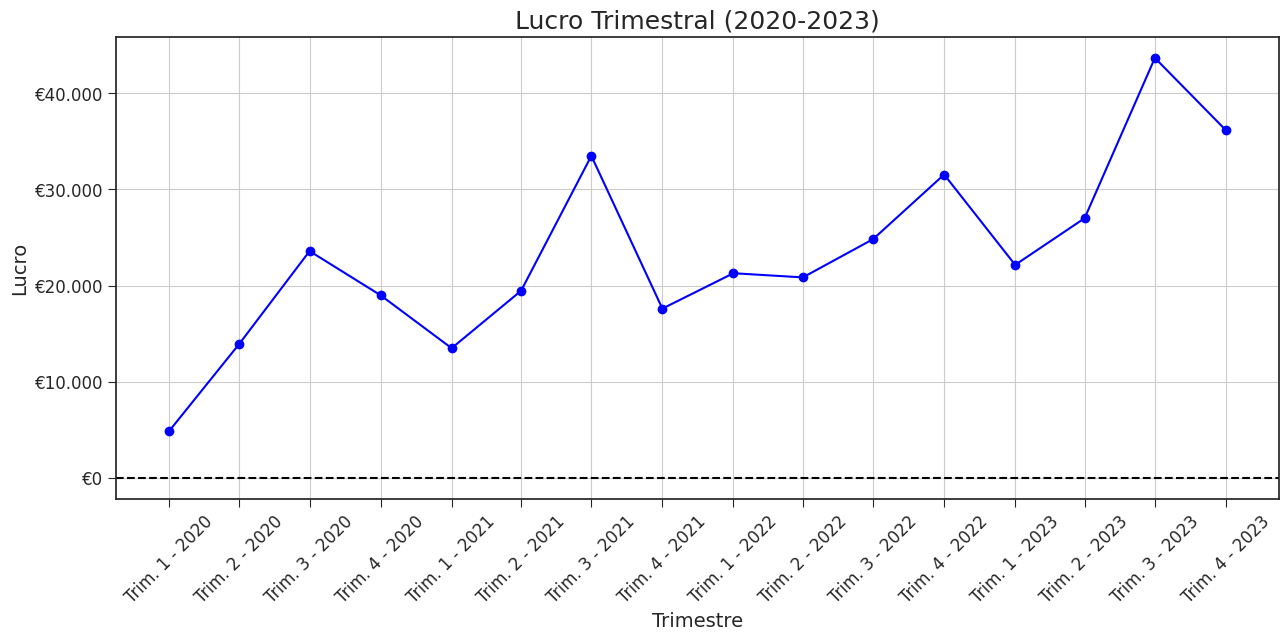

In [12]:
# Plotando a série temporal agregada para o lucro da empresa
serie_somatoria_trimestral(
    df, "lucro", "Lucro Trimestral (2020-2023)", "Trimestre", "Lucro", "€"
)

#### 4.1.2 — Lucratividade por Segmento de Clientes

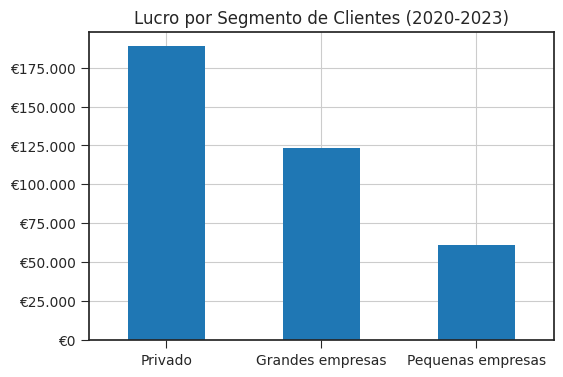

In [13]:
# Agregando os dados por segmento de clientes
df_segmento = (
    df.groupby("segmento")["lucro"].sum().sort_values(ascending=False).reset_index()
)

# Plotando o gráfico de barras para o lucro por segmento de clientes
df_segmento.plot(kind="bar", x="segmento", y="lucro", rot=0)

# Adicionando o separador de milhares no eixo y
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

# Adicionando título e rótulos dos eixos
plt.title("Lucro por Segmento de Clientes (2020-2023)")
plt.xlabel("")
plt.ylabel("")
plt.legend().remove()
plt.show()

#### 4.1.3 — Lucratividade por Região, País e Estados

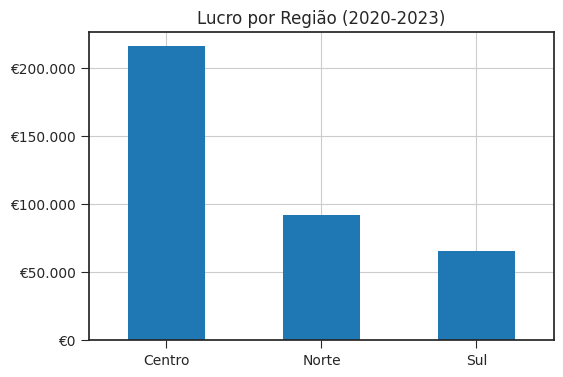

In [14]:
# Agregando os dados por segmento de regiao
df_regiao = (
    df.groupby("regiao")["lucro"].sum().sort_values(ascending=False).reset_index()
)

# Plotando o gráfico de barras para o lucro por regiao
df_regiao.plot(kind="bar", x="regiao", y="lucro", rot=0)

# Adicionando o separador de milhares no eixo y
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

# Adicionando título e rótulos dos eixos
plt.title("Lucro por Região (2020-2023)")
plt.xlabel("")
plt.ylabel("")
plt.legend().remove()
plt.show()

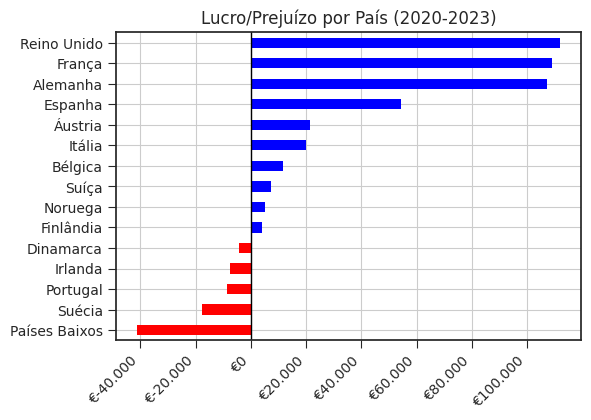

In [15]:
# Agregando os dados por país
df_pais = df.groupby("pais")["lucro"].sum().sort_values(ascending=True).reset_index()

# Definindo as cores com base em valores positivos ou negativos
colors = np.where(df_pais["lucro"] >= 0, "b", "r")

# Plota um gráfico de barras por país
df_pais.plot(kind="barh", x="pais", y="lucro", color=colors)

# Adicionando o separador de milhares no eixo x
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

# Configurando o gráfico
plt.axvline(x=0, color="black", linewidth=1)
plt.title("Lucro/Prejuízo por País (2020-2023)")
plt.ylabel("")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.legend().remove()
plt.show()

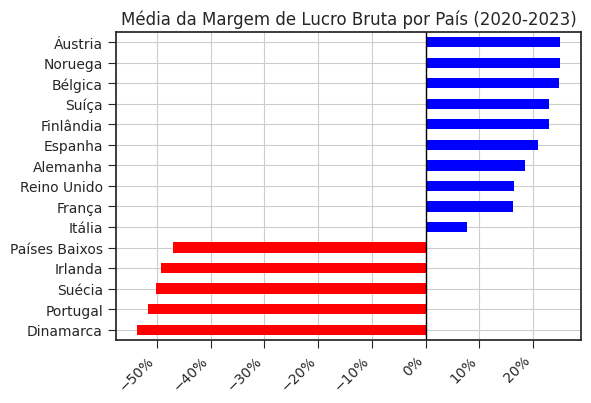

In [16]:
# Agregando os dados por país
df_pais2 = (
    df.groupby("pais")["margem_bruta"].mean().sort_values(ascending=True).reset_index()
)

# Definindo as cores com base em valores positivos ou negativos
colors = np.where(df_pais2["margem_bruta"] >= 0, "b", "r")

# Plota um gráfico de barras por país
df_pais2.plot(kind="barh", x="pais", y="margem_bruta", color=colors)

# Adicionando a porcentagem no eixo x
plt.gca().xaxis.set_major_formatter(mticker.PercentFormatter(1))

# Configurando o gráfico
plt.axvline(x=0, color="black", linewidth=1)
plt.title("Média da Margem de Lucro Bruta por País (2020-2023)")
plt.ylabel("")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.legend().remove()
plt.show()

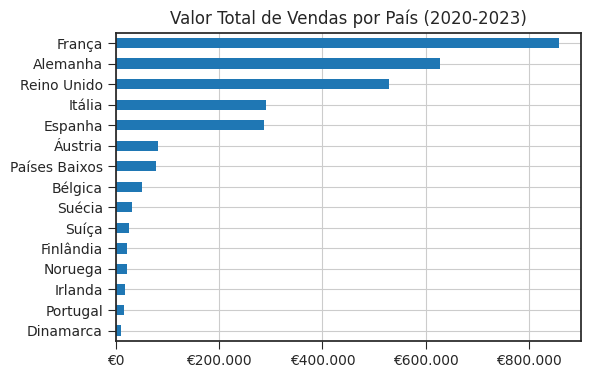

In [17]:
# Agrengando os dados de vendas por país
df_vendas = df.groupby("pais")["vendas"].sum().sort_values(ascending=True).reset_index()

# Plota um gráfico de barras por país
df_vendas.plot(kind="barh", x="pais", y="vendas")

# Adicionando o separador de milhares no eixo x
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

# Adicionando título e rótulos dos eixos
plt.title("Valor Total de Vendas por País (2020-2023)")
plt.xlabel("")
plt.ylabel("")
plt.legend().remove()
plt.show()

#### 4.1.4 — Lucratividade por Categoria de Produto

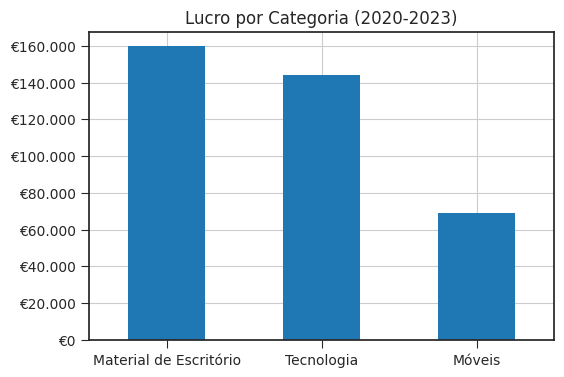

In [18]:
# Agrupando os dados por categoria
df_categoria = (
    df.groupby("categoria")["lucro"].sum().sort_values(ascending=False).reset_index()
)

# Plotando um gráfico de barras para o lucro por categoria
df_categoria.plot(kind="bar", x="categoria", y="lucro", rot=0)

# Adicionando o separador de milhares no eixo y
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

# Adicionando título e rótulos dos eixos
plt.title("Lucro por Categoria (2020-2023)")
plt.xlabel("")
plt.ylabel("")
plt.legend().remove()
plt.show()

#### 4.1.5 — Lucratividade por Subcategoria de Produto

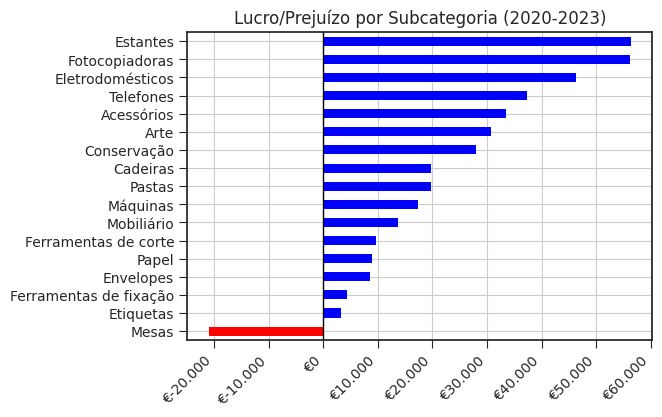

In [19]:
# Agrupando os dados por subcategoria
df_subcategoria = (
    df.groupby("subcategoria")["lucro"].sum().sort_values(ascending=True).reset_index()
)

# Definindo as cores com base em valores positivos ou negativos
colors = np.where(df_subcategoria["lucro"] >= 0, "b", "r")

# Plota um gráfico de barras por país
df_subcategoria.plot(kind="barh", x="subcategoria", y="lucro", color=colors)

# Adicionando o separador de milhares no eixo x
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

# Configurando o gráfico
plt.axvline(x=0, color="black", linewidth=1)
plt.title("Lucro/Prejuízo por Subcategoria (2020-2023)")
plt.ylabel("")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.legend().remove()
plt.show()

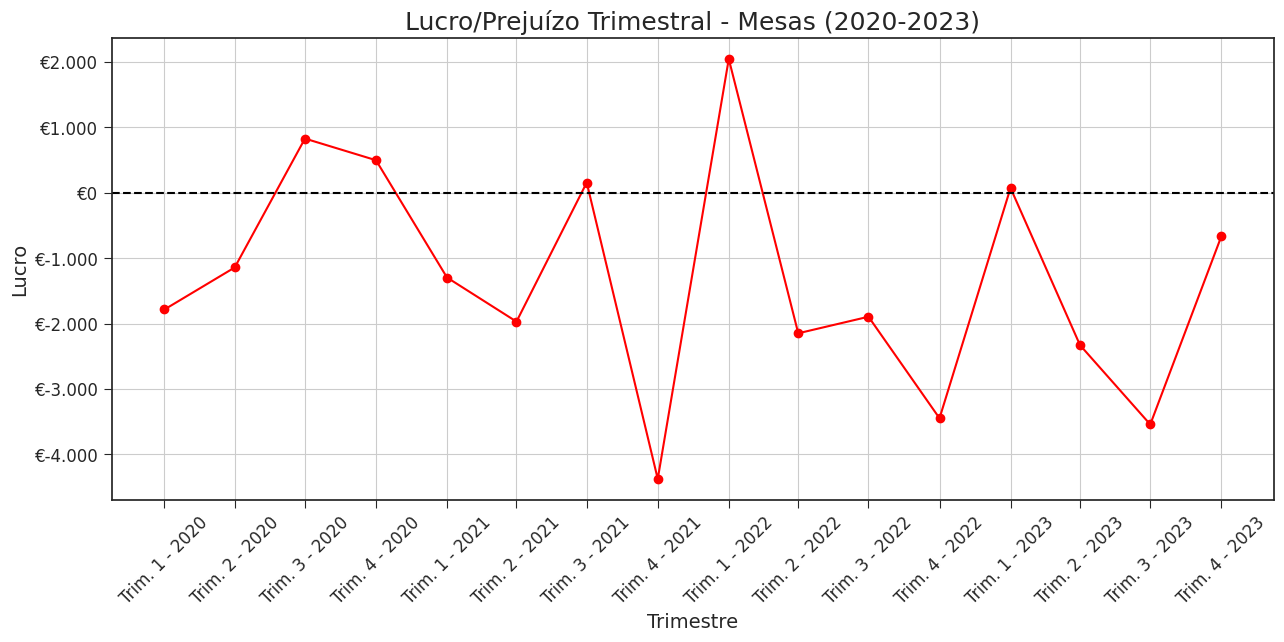

In [20]:
# Selecionando os dados da subcategoria "Mesas"
df_mesas = df[df["subcategoria"] == "Mesas"]

# Plotando os dados ao longo do tempo
serie_somatoria_trimestral(
    df_mesas,
    "lucro",
    "Lucro/Prejuízo Trimestral - Mesas (2020-2023)",
    "Trimestre",
    "Lucro",
    "€",
)

In [21]:
# Calculando o prejuízo da subcategoria "Mesas"
prejuizo_mesas = df_mesas["lucro"].sum()
print(f"Prejuízo total da subcategoria 'Mesas': €{prejuizo_mesas:,.2f}")

Prejuízo total da subcategoria 'Mesas': €-20,998.42


/tmp/ipykernel_5931/1624072075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mesas["lucro_prejuizo"] = np.where(df_mesas["lucro"] >= 0, "Lucro", "Prejuízo")


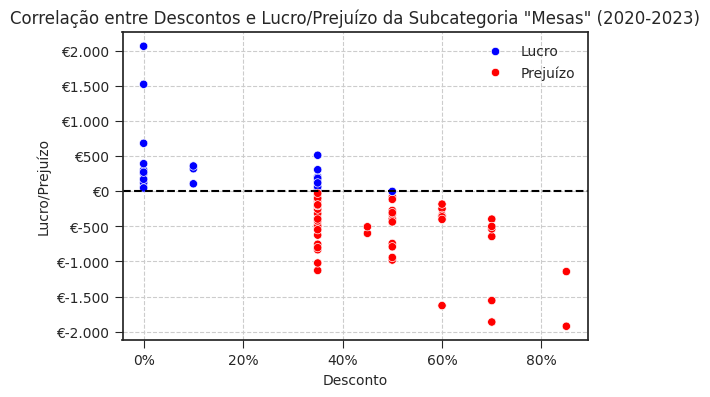

In [22]:
# Criando uma nova coluna para distinguir entre prejuízo e lucro
df_mesas["lucro_prejuizo"] = np.where(df_mesas["lucro"] >= 0, "Lucro", "Prejuízo")

# Definindo a ordem e as cores para a legenda
hue_order = ["Lucro", "Prejuízo"]
palette = ["blue", "red"]

# Plotando um gráfico de correlação
sns.scatterplot(
    x="desconto",
    y="lucro",
    data=df_mesas,
    hue="lucro_prejuizo",
    hue_order=hue_order,
    palette=palette,
)

# Adicionando título e rótulos dos eixos
plt.title(
    'Correlação entre Descontos e Lucro/Prejuízo da Subcategoria "Mesas" (2020-2023)'
)
plt.xlabel("Desconto")
plt.ylabel("Lucro/Prejuízo")

# Adicionando o separador de milhares no eixo y
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

# Adicionando a porcentagem de desconto no eixo x
plt.gca().xaxis.set_major_formatter(mticker.PercentFormatter(1))

# Adicionando uma linha horizontal no zero
plt.axhline(0, color="black", linestyle="--")

# Adicionando um grid
plt.grid(True, linestyle="--")

# Removendo o título da legenda
plt.legend(title=None)

plt.show()

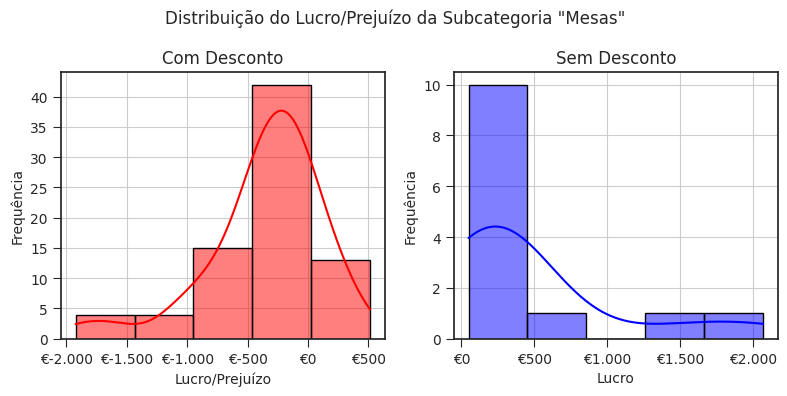

In [23]:
# Separando os dados em dois dataframes
df_disconto_mesas = df_mesas[df_mesas["desconto"] > 0]
df_nao_disconto_mesas = df_mesas[df_mesas["desconto"] == 0]

plt.figure(figsize=(8, 4))

# Plotando os histogramas para os dados com desconto
plt.subplot(1, 2, 1)
sns.histplot(data=df_disconto_mesas, x="lucro", kde=True, color="red", bins=5)
plt.title("Com Desconto")
plt.xlabel("Lucro/Prejuízo")
plt.ylabel("Frequência")

# Adicionando o separador de milhares no eixo x
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

# Plotando o histograma para os dados sem desconto
plt.subplot(1, 2, 2)
sns.histplot(data=df_nao_disconto_mesas, x="lucro", kde=True, color="blue", bins=5)
plt.title("Sem Desconto")
plt.xlabel("Lucro")
plt.ylabel("Frequência")

# Adicionando o separador de milhares no eixo x
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

# Configurando
plt.suptitle('Distribuição do Lucro/Prejuízo da Subcategoria "Mesas"')
plt.tight_layout()
plt.show()

In [24]:
# Calculando a correlação de Pearson e o valor-p entre desconto e lucro
correlation, p_value = stats.pearsonr(df_mesas["desconto"], df_mesas["lucro"])
print(f"Correlação de Pearson: {correlation:.2f}")
print(f"Valor-P: {p_value:.2e}")

Correlação de Pearson: -0.70
Valor-P: 1.31e-14


#### 4.1.6 — Lucratividade por Produto

In [25]:
# Verificando a quantidade de produtos disponíveis para venda
print(f"Quantidade de produtos disponíveis para venda: {df['nome_produto'].nunique()}")

Quantidade de produtos disponíveis para venda: 1856


In [26]:
# Agrupando os produtos e somando o lucro
df_produtos = (
    df.groupby("nome_produto")["lucro"].sum().sort_values(ascending=False).reset_index()
)

print(df_produtos.shape)
df_produtos.head()

(1856, 2)


,nome_produto,lucro
0,"Hoover Stove, Red",10345.5840
1,"Nokia Smart Phone, Full Size",6890.7675
2,"Hamilton Beach Stove, Silver",5452.4640
3,"SAFCO Executive Leather Armchair, Black",5003.1000
4,"Safco Classic Bookcase, Metal",4681.8570


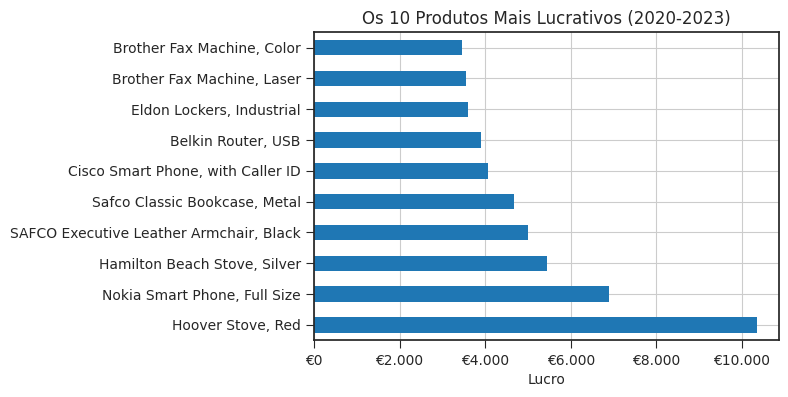

In [27]:
# Selecionando os 10 produtos mais lucrativos
df_produtos_top10 = df_produtos.head(10)

# Plotando um gráfico de barras para os 10 produtos mais lucrativos
df_produtos_top10.plot(kind="barh", x="nome_produto", y="lucro")

# Adicionando o separador de milhares no eixo x
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

# Adicionando título e rótulos dos eixos
plt.title("Os 10 Produtos Mais Lucrativos (2020-2023)")
plt.xlabel("Lucro")
plt.ylabel("")
plt.legend().remove()
plt.show()

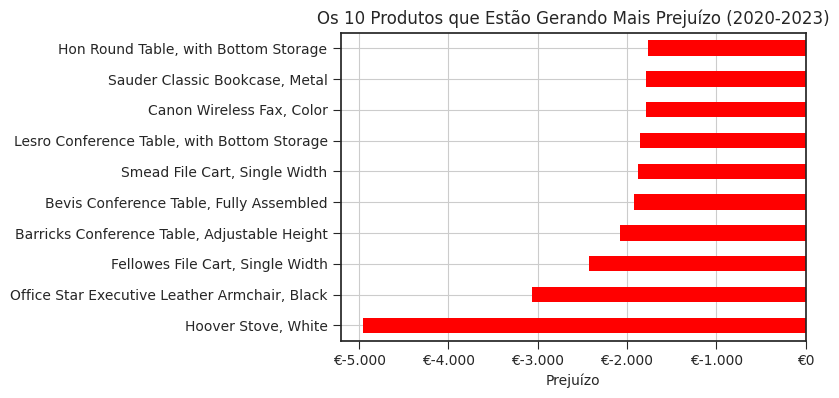

In [28]:
# Selecionando os 10 produtos que mais causam prejuízo e invertendo a ordem dos dados
df_produtos_bottom10 = df_produtos.tail(10)
df_produtos_bottom10 = df_produtos_bottom10.iloc[::-1]

# Plotando um gráfico de barras para os 10 produtos que estão gerando mais prejuízo
df_produtos_bottom10.plot(kind="barh", x="nome_produto", y="lucro", color="red")

# Adicionando o separador de milhares no eixo x
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

# Adicionando título e rótulos dos eixos
plt.title("Os 10 Produtos que Estão Gerando Mais Prejuízo (2020-2023)")
plt.xlabel("Prejuízo")
plt.ylabel("")
plt.legend().remove()
plt.show()

In [29]:
# Contanto quantos produtos geraram lucro e quantos geraram prejuízo
produtos_lucro = df_produtos[df_produtos["lucro"] >= 0].shape[0]
produtos_prejuizo = df_produtos[df_produtos["lucro"] < 0].shape[0]
print(f"Produtos com Lucro: {produtos_lucro}")
print(f"Produtos com Prejuízo: {produtos_prejuizo}")

Produtos com Lucro: 1444
Produtos com Prejuízo: 412


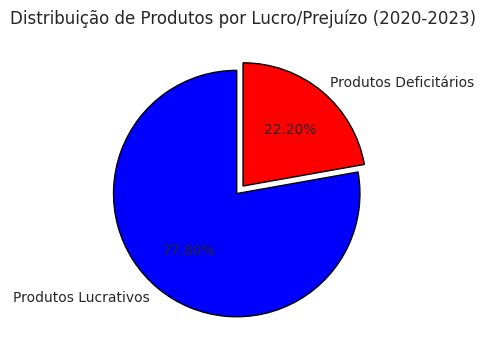

In [30]:
# Criando um gráfico de pizza
plt.figure(figsize=(4, 4))

# Plotando o gráfico
plt.pie(
    [produtos_lucro, produtos_prejuizo],
    labels=["Produtos Lucrativos", "Produtos Deficitários"],
    autopct="%1.2f%%",
    colors=["blue", "red"],
    startangle=90,
    explode=(0.08, 0),
    wedgeprops={"edgecolor": "black"},
)

# Configurando o gráfico
plt.title("Distribuição de Produtos por Lucro/Prejuízo (2020-2023)")
plt.show()

In [31]:
# Selecionando os produtos que geraram prejuízo
df_deficitarios = df_produtos[df_produtos["lucro"] < 0]
# Somando o prejuízo total
prejuizo_total = df_deficitarios["lucro"].sum()
print(f"Prejuízo Total: €{prejuizo_total:,.0f}")

# Selecionando os produtos que geraram lucro
df_lucrativos = df_produtos[df_produtos["lucro"] >= 0]
# Somando o lucro total
lucro_total = df_produtos[df_produtos["lucro"] >= 0]["lucro"].sum()
print(f"Lucro Total: €{lucro_total:,.0f}")

Prejuízo Total: €-109,295
Lucro Total: €482,125


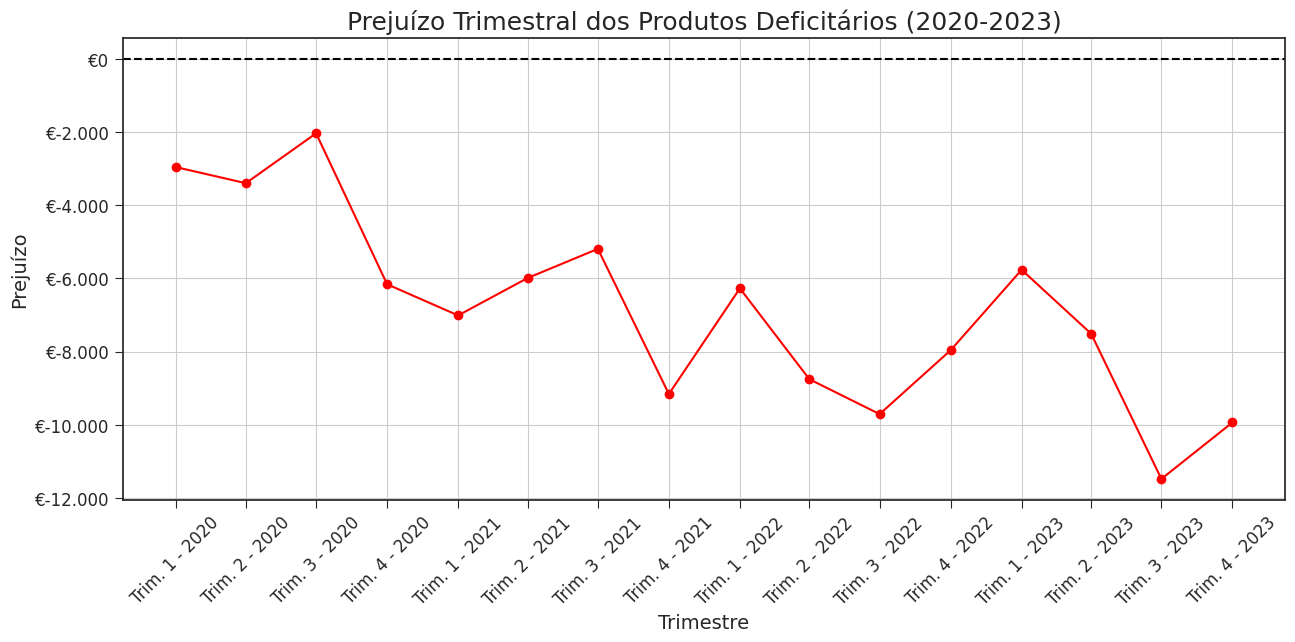

In [32]:
# Verificando o prejuizo que os produtos deficitários geraram ao longo do tempo
serie_somatoria_trimestral(
    df[df["nome_produto"].isin(df_deficitarios["nome_produto"])],
    "lucro",
    "Prejuízo Trimestral dos Produtos Deficitários (2020-2023)",
    "Trimestre",
    "Prejuízo",
    "€",
)

### 4.2 — Análise da Estratégia de Descontos

In [33]:
# Selecionando no df original todos as linhas que contém os produtos deficitários
df_deficitarios2 = df[df["nome_produto"].isin(df_deficitarios["nome_produto"])]

/tmp/ipykernel_5931/1814762432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deficitarios2["lucro_prejuizo"] = np.where(


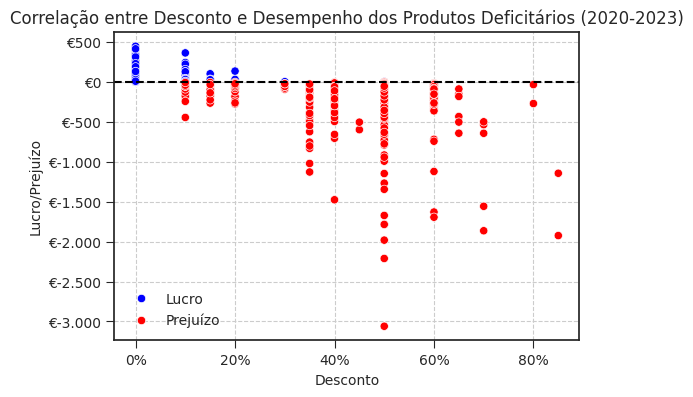

In [34]:
# Criando um nova coluna para distinguir entre prejuízo e lucro
df_deficitarios2["lucro_prejuizo"] = np.where(
    df_deficitarios2["lucro"] >= 0, "Lucro", "Prejuízo"
)

# Definindo a ordem e as cores para a legenda
hue_order = ["Lucro", "Prejuízo"]
palette = ["blue", "red"]

# Plotando um gráfico de correlação
sns.scatterplot(
    x="desconto",
    y="lucro",
    data=df_deficitarios2,
    hue="lucro_prejuizo",
    hue_order=hue_order,
    palette=palette,
)

# Adicionando título e rótulos dos eixos
plt.title(
    "Correlação entre Desconto e Desempenho dos Produtos Deficitários (2020-2023)"
)
plt.xlabel("Desconto")
plt.ylabel("Lucro/Prejuízo")

# Adicionando o separador de milhares no eixo y
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

# Adicionando a porcentagem de desconto no eixo x
plt.gca().xaxis.set_major_formatter(mticker.PercentFormatter(1))

# Configurando o gráfico
plt.axhline(0, color="black", linestyle="--")
plt.grid(True, linestyle="--")
plt.legend(title=None)
plt.show()

In [35]:
# Calculando a correlação de Pearson e o valor-p entre desconto e lucro
correlation, p_value = stats.pearsonr(
    df_deficitarios2["desconto"], df_deficitarios2["lucro"]
)
print(f"Correlação de Pearson: {correlation:.2f}")
print(f"Valor-P: {p_value:.2e}")

Correlação de Pearson: -0.48
Valor-P: 7.48e-111


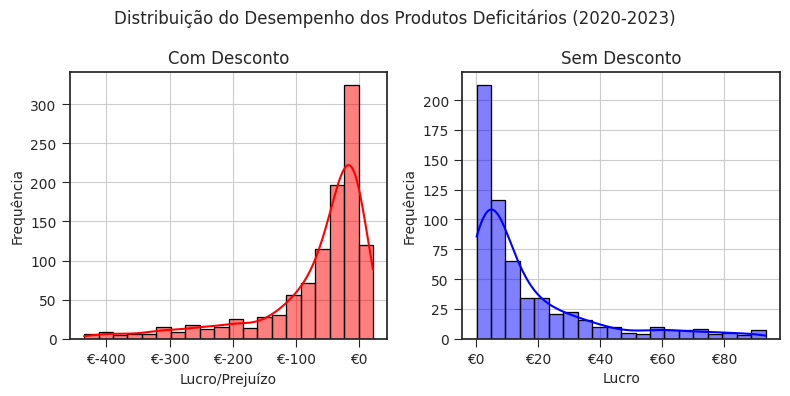

In [36]:
# Separando os dados em dois dataframes
df_disconto_deficitarios = df_deficitarios2[df_deficitarios2["desconto"] > 0]
df_nao_disconto_deficitarios = df_deficitarios2[df_deficitarios2["desconto"] == 0]

# Calculando os quartis
lower = df_disconto_deficitarios["lucro"].quantile(0.05)
upper = df_disconto_deficitarios["lucro"].quantile(0.95)

# Recortando os dados
df_disconto_deficitarios_trimmed = df_disconto_deficitarios[
    (df_disconto_deficitarios["lucro"] > lower)
    & (df_disconto_deficitarios["lucro"] < upper)
]

# Calculando os quartis
lower = df_nao_disconto_deficitarios["lucro"].quantile(0.05)
upper = df_nao_disconto_deficitarios["lucro"].quantile(0.95)

# Recortando os dados
df_nao_disconto_deficitarios_trimmed = df_nao_disconto_deficitarios[
    (df_nao_disconto_deficitarios["lucro"] > lower)
    & (df_nao_disconto_deficitarios["lucro"] < upper)
]

# Plotando os histogramas
plt.figure(figsize=(8, 4))

# Plotando os histogramas para os dados com desconto
plt.subplot(1, 2, 1)
sns.histplot(
    data=df_disconto_deficitarios_trimmed, x="lucro", kde=True, color="red", bins=20
)
plt.title("Com Desconto")
plt.xlabel("Lucro/Prejuízo")
plt.ylabel("Frequência")

# Adicionando o separador de milhares no eixo x
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

# Plotando o histograma para os dados sem desconto
plt.subplot(1, 2, 2)
sns.histplot(
    data=df_nao_disconto_deficitarios_trimmed,
    x="lucro",
    kde=True,
    color="blue",
    bins=20,
)
plt.title("Sem Desconto")
plt.xlabel("Lucro")
plt.ylabel("Frequência")

# Adicionando o separador de milhares no eixo x
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

# Configurando
plt.suptitle("Distribuição do Desempenho dos Produtos Deficitários (2020-2023)")
plt.tight_layout()
plt.show()

In [37]:
# Criando uma cópia do dataframe original
df2 = df.copy()

# Removendo as linhas que contém os produtos deficitários
df2 = df2[~df2["nome_produto"].isin(df_deficitarios["nome_produto"])]

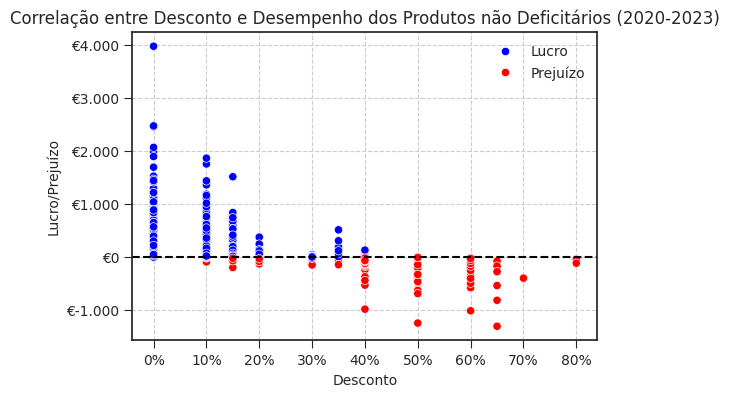

In [38]:
# Criando uma nova coluna para distinguir entre prejuízo e lucro
df2["lucro_prejuizo"] = np.where(df2["lucro"] >= 0, "Lucro", "Prejuízo")

# Definindo a ordem e as cores para a legenda
hue_order = ["Lucro", "Prejuízo"]
palette = ["blue", "red"]

# Plotando um gráfico de correlação
sns.scatterplot(
    x="desconto",
    y="lucro",
    data=df2,
    hue="lucro_prejuizo",
    hue_order=hue_order,
    palette=palette,
)
plt.title(
    "Correlação entre Desconto e Desempenho dos Produtos não Deficitários (2020-2023)"
)
plt.xlabel("Desconto")
plt.ylabel("Lucro/Prejuízo")

# Adicionando o separador de milhares no eixo y
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

# Adicionando a porcentagem de desconto no eixo x
plt.gca().xaxis.set_major_formatter(mticker.PercentFormatter(1))

# Adicionando uma linha horizontal no zero
plt.axhline(0, color="black", linestyle="--")

# Configurando o gráfico
plt.grid(True, linestyle="--")
plt.legend(title=None)
plt.show()

In [39]:
# Calculando a correlação de Pearson e o valor-p entre desconto e lucro
correlation, p_value = stats.pearsonr(df2["desconto"], df2["lucro"])
print(f"Correlação de Pearson: {correlation:.2f}")
print(f"Valor-P: {p_value:.2e}")

Correlação de Pearson: -0.23
Valor-P: 1.12e-95


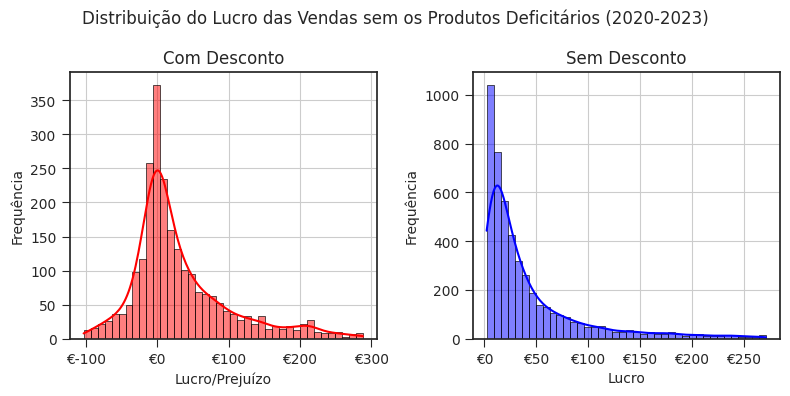

In [40]:
# Separando os dados de todas as vendas em dois dataframes
df_disconto = df2[df2["desconto"] > 0]
df_nao_disconto = df2[df2["desconto"] == 0]

# Calculando os quartis
lower = df_disconto["lucro"].quantile(0.05)
upper = df_disconto["lucro"].quantile(0.95)

# Recortando os dados
df_disconto_trimmed = df_disconto[
    (df_disconto["lucro"] > lower) & (df_disconto["lucro"] < upper)
]

# Calculando os quartis
lower = df_nao_disconto["lucro"].quantile(0.05)
upper = df_nao_disconto["lucro"].quantile(0.95)

# Recortando os dados
df_nao_disconto_trimmed = df_nao_disconto[
    (df_nao_disconto["lucro"] > lower) & (df_nao_disconto["lucro"] < upper)
]

# Plotando os histogramas
plt.figure(figsize=(8, 4))

# Plotando os histogramas para os dados com desconto
plt.subplot(1, 2, 1)
sns.histplot(data=df_disconto_trimmed, x="lucro", kde=True, color="red", bins=40)
plt.title("Com Desconto")
plt.xlabel("Lucro/Prejuízo")
plt.ylabel("Frequência")

# Adicionando o separador de milhares no eixo x
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

# Plotando o histograma para os dados sem desconto
plt.subplot(1, 2, 2)
sns.histplot(data=df_nao_disconto_trimmed, x="lucro", kde=True, color="blue", bins=40)
plt.title("Sem Desconto")
plt.xlabel("Lucro")
plt.ylabel("Frequência")

# Adicionando o separador de milhares no eixo x
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

# Configurando
plt.suptitle(
    "Distribuição do Lucro das Vendas sem os Produtos Deficitários (2020-2023)"
)
plt.tight_layout()
plt.show()

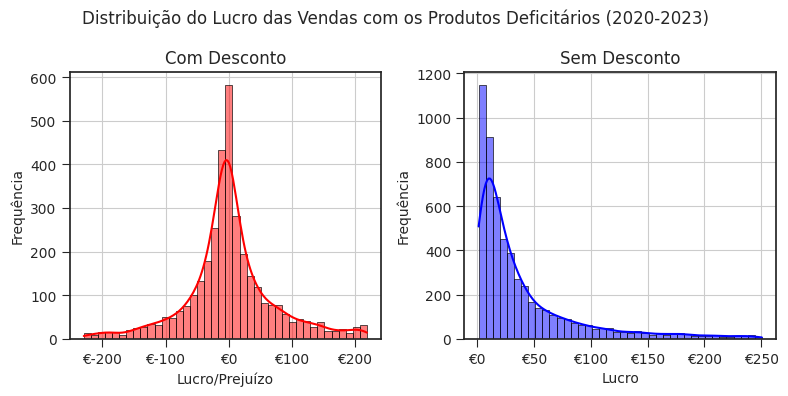

In [41]:
# Separando os dados do df original em dois dataframes
df_disconto2 = df[df["desconto"] > 0]
df_nao_disconto2 = df[df["desconto"] == 0]

# Calculando os quartis
lower = df_disconto2["lucro"].quantile(0.05)
upper = df_disconto2["lucro"].quantile(0.95)

# Recortando os dados
df_disconto_trimmed2 = df_disconto2[
    (df_disconto2["lucro"] > lower) & (df_disconto2["lucro"] < upper)
]

# Calculando os quartis
lower = df_nao_disconto2["lucro"].quantile(0.05)
upper = df_nao_disconto2["lucro"].quantile(0.95)

# Recortando os dados
df_nao_disconto_trimmed2 = df_nao_disconto2[
    (df_nao_disconto2["lucro"] > lower) & (df_nao_disconto2["lucro"] < upper)
]

# Plotando os histogramas
plt.figure(figsize=(8, 4))

# Plotando os histogramas para os dados com desconto
plt.subplot(1, 2, 1)
sns.histplot(data=df_disconto_trimmed2, x="lucro", kde=True, color="red", bins=40)
plt.title("Com Desconto")
plt.xlabel("Lucro/Prejuízo")
plt.ylabel("Frequência")

# Adicionando o separador de milhares no eixo x
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

# Plotando o histograma para os dados sem desconto
plt.subplot(1, 2, 2)
sns.histplot(data=df_nao_disconto_trimmed2, x="lucro", kde=True, color="blue", bins=40)
plt.title("Sem Desconto")
plt.xlabel("Lucro")
plt.ylabel("Frequência")

# Adicionando o separador de milhares no eixo x
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

# Configurando
plt.suptitle(
    "Distribuição do Lucro das Vendas com os Produtos Deficitários (2020-2023)"
)
plt.tight_layout()
plt.show()